In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
df= pd.read_csv("pm10.csv").iloc[:, -1]


In [13]:
f = lambda x: x.replace(",", ".")
data = pd.to_numeric(df.apply(f))

In [16]:
import sklearn
from sklearn.neighbors import NearestNeighbors

In [19]:
data_ = np.asarray(data).reshape(-1, 1)

In [20]:
nn = NearestNeighbors(n_neighbors= 10)
nn.fit(data_)

NearestNeighbors(n_neighbors=10)

In [22]:
neighbors, indexes = nn.kneighbors(data_)

In [45]:
a = neighbors.mean(-1)

In [65]:
outliers = indexes[np.where(neighbors> 20)]

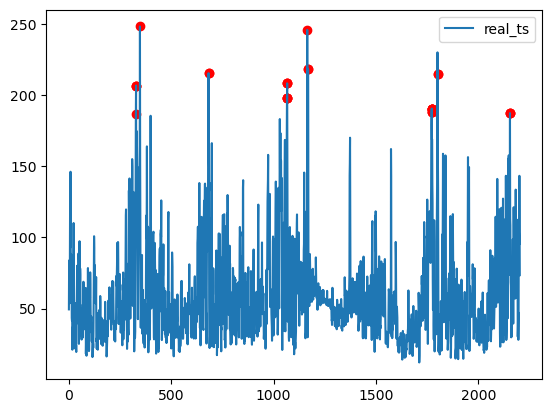

In [66]:
plt.plot(data, label = "real_ts")
plt.scatter(outliers, data[outliers], color = "red")
plt.legend()
plt.show()